<a href='https://www.latos.ai'> <img src='../logo_latos.jpeg' style="width: 200px;" align="right"/></a>
*Esse notebook faz parte do curso de [Python e Ciência de Dados para a Indústria](https://www.latos.ai/academy/python-e-ciencia-de-dados) da [Latos Academy](https://www.latos.ai).*

Latos© copyright 2022. All Rights Reserved.

# Curso rápido de Aprendizado de Máquina

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

## Análise dos dados

In [2]:
root_dir = Path.cwd().parents[1]
data_dir = root_dir / 'data'

iris = pd.read_csv(data_dir / 'iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

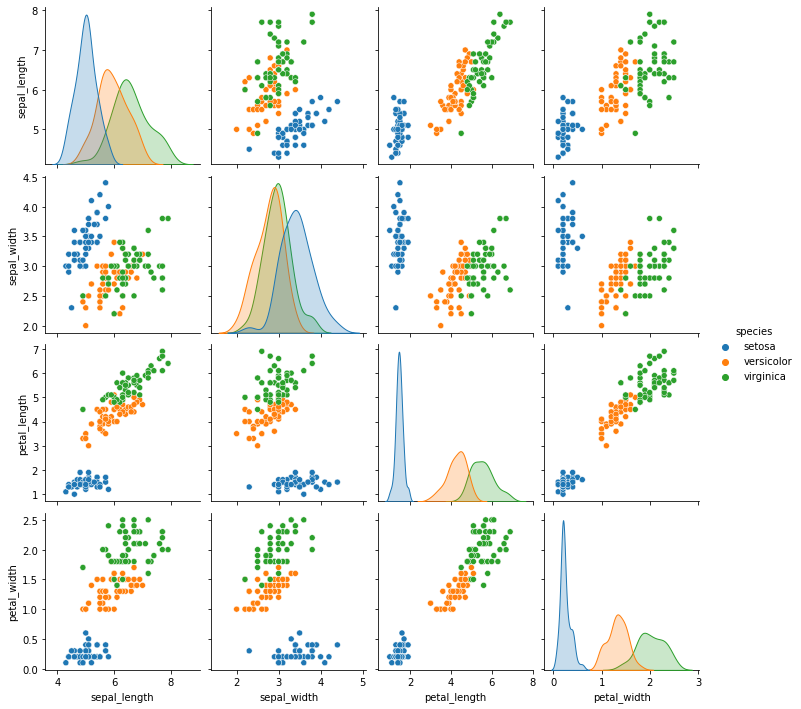

In [6]:
sns.pairplot(iris, hue='species')

<AxesSubplot:>

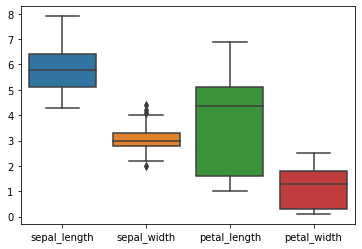

In [7]:
sns.boxplot(data=iris)

<AxesSubplot:>

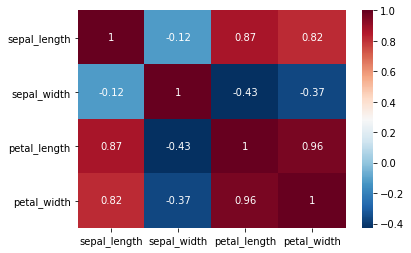

In [8]:
corrmat = iris.corr()
sns.heatmap(corrmat, annot=True, cmap="RdBu_r")

## Classificação

In [9]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

In [11]:
y_train.value_counts()

versicolor    44
virginica     39
setosa        37
Name: species, dtype: int64

### Exemplo de aplicação para árvore de decisão

In [12]:
from sklearn import tree

mod = tree.DecisionTreeClassifier(max_depth=3)
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9333333333333333

In [13]:
prediction

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

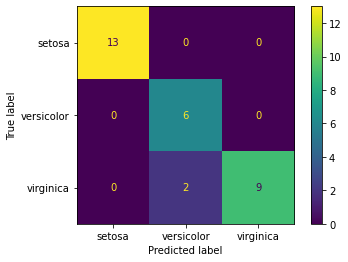

In [14]:
cm = metrics.confusion_matrix(y_test, prediction, labels=mod.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=mod.classes_)

disp.plot()
plt.show()

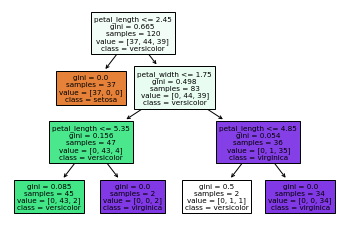

In [15]:
tree.plot_tree(mod,
               feature_names=iris.columns,
               class_names=iris['species'].value_counts().keys(),
               filled=True)
plt.show()

### Utilizando outras técnicas

In [16]:
from sklearn import svm

mod = svm.SVC()
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9666666666666667

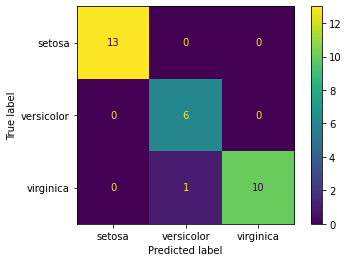

In [17]:
cm = metrics.confusion_matrix(y_test, prediction, labels=mod.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=mod.classes_)

disp.plot()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier()
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9666666666666667

Veja a aplicação mais completa em: https://github.com/terryz1/Iris_Classification/blob/master/iris_classification.ipynb

### Regressão

In [19]:
iris_rg = pd.get_dummies(iris, drop_first=True)
iris_rg

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [20]:
X = iris_rg.drop('sepal_length', axis=1)
y = iris_rg['sepal_length']

In [21]:
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X, y, test_size= 0.3, 
                                                                random_state= 101)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(X_train_rg, y_train_rg)

LinearRegression()

In [24]:
pred = lr.predict(X_test_rg)

In [25]:
metrics.r2_score(pred, y_test_rg.values)

0.793746714356526

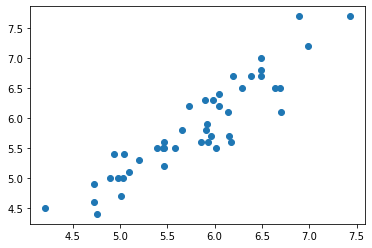

In [26]:
plt.plot(pred, y_test_rg.values, 'o')

Mais informações em:

https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1

### Clusterização

In [27]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=3)
prediction = k_means.fit_predict(X_train)
prediction

array([1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1], dtype=int32)

In [28]:
metrics.accuracy_score(prediction, y_train)

0.0

In [29]:
y_train.head(10)

130     virginica
119     virginica
29         setosa
0          setosa
62     versicolor
93     versicolor
131     virginica
5          setosa
16         setosa
82     versicolor
Name: species, dtype: object

In [30]:
di = {'setosa': 1, 'virginica': 2, 'versicolor': 0}
y_train_num = y_train.replace(di)

In [31]:
metrics.accuracy_score(prediction, y_train_num)

0.075

In [32]:
X_train['prediction'] = prediction

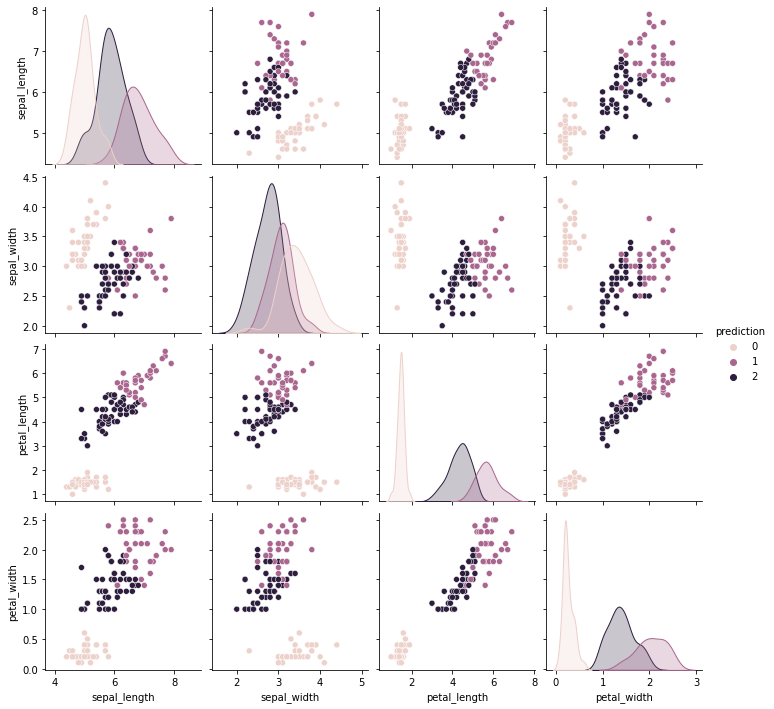

In [33]:
sns.pairplot(X_train, hue='prediction')

## Redução da dimensionalidade

In [34]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.loc[:, variables].values
y = iris.loc[:, ['species']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [36]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [37]:
x_pca['species'] = y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'species']
x_pca.head()

,PC1,PC2,PC3,PC4,species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


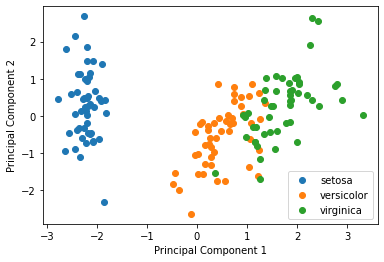

In [38]:
species = ['setosa', 'versicolor', 'virginica']
for specie in species:
    plt.scatter(x_pca[x_pca['species'] == specie]['PC1'],
                x_pca[x_pca['species'] == specie]['PC2'],
                label=specie)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Mais informações em:

https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c

## Seleção de modelo

In [39]:
X_train.drop('prediction', axis=1, inplace=True)

In [40]:
from sklearn import svm

mod = svm.SVC()
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9666666666666667

In [41]:
mod.C  # Regularization parameter.

1.0

In [42]:
mod.kernel  # Specifies the kernel type to be used in the algorithm.

'rbf'

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf']}

In [44]:
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.875 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [45]:
pred_grid = grid.predict(X_test)

In [46]:
print(metrics.confusion_matrix(y_test, pred_grid))

[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


In [47]:
metrics.accuracy_score(pred_grid, y_test)

1.0

In [48]:
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

Mais informações em:
    
https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c